<a href="https://colab.research.google.com/github/saidnaqwe/Web-Analytics-Data620/blob/main/Said_Naqwe_Assignment_High_Frequency_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data 620 Web Analytics

Assignment High Frequency Words

Said Naqwe

**Introduction:**  
For this analysis - Assignment High Frequency Words, I chose a simple and effective approach by selecting one of the corpora available in the freely accessible Gutenberg library. This library, which I accessed through the NLTK package, provides a rich collection of texts that are perfect for linguistic and computational exploration. Using this resource, I was able to analyze the selected corpus and uncover meaningful insights through text processing and data analysis.

**1. Choosing a corpus of interest.**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [8]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
austen = nltk.Text(nltk.corpus.gutenberg.words('austen-persuasion.txt'))

**2. Total Unique Words.**



**How many total unique words are in the corpus?**  
Unique words can be defined in various interesting and defensible ways. For my analysis, I calculated the total number of 'words' by taking the length of the corpus.


In [11]:
AW=len(austen)
AW

98171

However, this approach counts every word, including duplicates. To address this, I can remove duplicates by using Python’s `set` function to wrap the corpus. Once duplicates are eliminated, I can sort the results to examine the unique words more effectively. Let’s apply this method and see what we discover.


In [12]:
print(*sorted(set(austen))[:100], sep = "   ")

!   !"   !'   !--   "   &   '   '.   (   )   ),   ).   );   ,   ,"   ,"--   ,"--"   ,'   ,)   ,)--   ,--   ,--`   -   --   --!   --"   --(   ---   ---.   --;   .   ."   .'   .'"   .)   .,   .--   .--,   .--,"   1   10   11   12   13   14   15   16   17   1760   1784   1785   1787   1789   1791   18   1800   1803   1806   1810   1814   1818   19   1st   2   20   21   22   23   24   29th   3   4   5   6   7   8   9   :   :"   :--   :--"   ;   ;"   ;'   ;)   ;--   ;--"   ?   ?"   ?'   ?'"   ?)   ?),   A   About   Abydos   Accordingly   Admiral   Admiralty   After


The first nearly 100 items in the list are not actual words!  


**'Unique' Words**  
Upon examining a sample of the extracted words, it becomes clear that the list includes not only words but also punctuation marks and numbers. Additionally, Python treats capital letters as distinct from their lowercase counterparts. To accurately identify unique words, it is necessary to convert all words to lowercase and eliminate any punctuation and numerical values.  

To achieve this, I modified code from the textbook to exclude punctuation and numbers while standardizing capitalization. This ensures that only true unique words are included in the analysis.


In [13]:
# create list of all words including duplicates, but excluding punctuation, numbers and capitalization
AWwoNP = [word.lower() for word in austen if word.isalpha()]

# print
print(*AWwoNP[:100], sep = "   ")

persuasion   by   jane   austen   chapter   sir   walter   elliot   of   kellynch   hall   in   somersetshire   was   a   man   who   for   his   own   amusement   never   took   up   any   book   but   the   baronetage   there   he   found   occupation   for   an   idle   hour   and   consolation   in   a   distressed   one   there   his   faculties   were   roused   into   admiration   and   respect   by   contemplating   the   limited   remnant   of   the   earliest   patents   there   any   unwelcome   sensations   arising   from   domestic   affairs   changed   naturally   into   pity   and   contempt   as   he   turned   over   the   almost   endless   creations   of   the   last   century   and   there   if   every   other   leaf   were   powerless   he   could   read   his   own


In [14]:
# take the length of the set of those words to find the number of unique words
len(set(AWwoNP))

5739

By calculating the length of the set of words, after removing punctuation, numbers, and capitalization, I found that the corpus contains 5,739 unique words.  



**How many unique words represent half of all words?**  

To determine how many unique words account for half of the total word count in the corpus, I started by creating a frequency distribution. This distribution captures the count of each unique word in the corpus after excluding numbers, punctuation, and capitalization. Using this frequency distribution, I wrote a function to iteratively add the frequencies of the most common words, starting from the most frequent and proceeding downward. The process continues until the cumulative total reaches at least half of the entire word count for the corpus. Along the way, I kept a running tally of how many word frequencies were summed to identify the number of unique words that represent half of the total words.



In [15]:
fdist = nltk.FreqDist(AWwoNP)
fdist

FreqDist({'the': 3329, 'to': 2808, 'and': 2801, 'of': 2570, 'a': 1595, 'in': 1389, 'was': 1337, 'her': 1204, 'had': 1186, 'she': 1146, ...})

In [16]:
tw=len(AWwoNP)
tcount=0
wcount=0
for word, count in fdist.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(tw/2):
        print(wcount)
        break

58


The following 58 unique words represent half of the total words in the corpus.

In [17]:
print(*[w for w,n in fdist.most_common()[:58]], sep = ", ")

the, to, and, of, a, in, was, her, had, she, i, it, he, be, not, that, as, for, but, his, with, you, have, at, all, anne, been, s, him, could, very, they, were, by, which, is, on, so, no, would, captain, from, their, mrs, elliot, there, or, more, them, mr, this, an, than, one, must, when, my, being


In [18]:
tw/2

42060.5

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

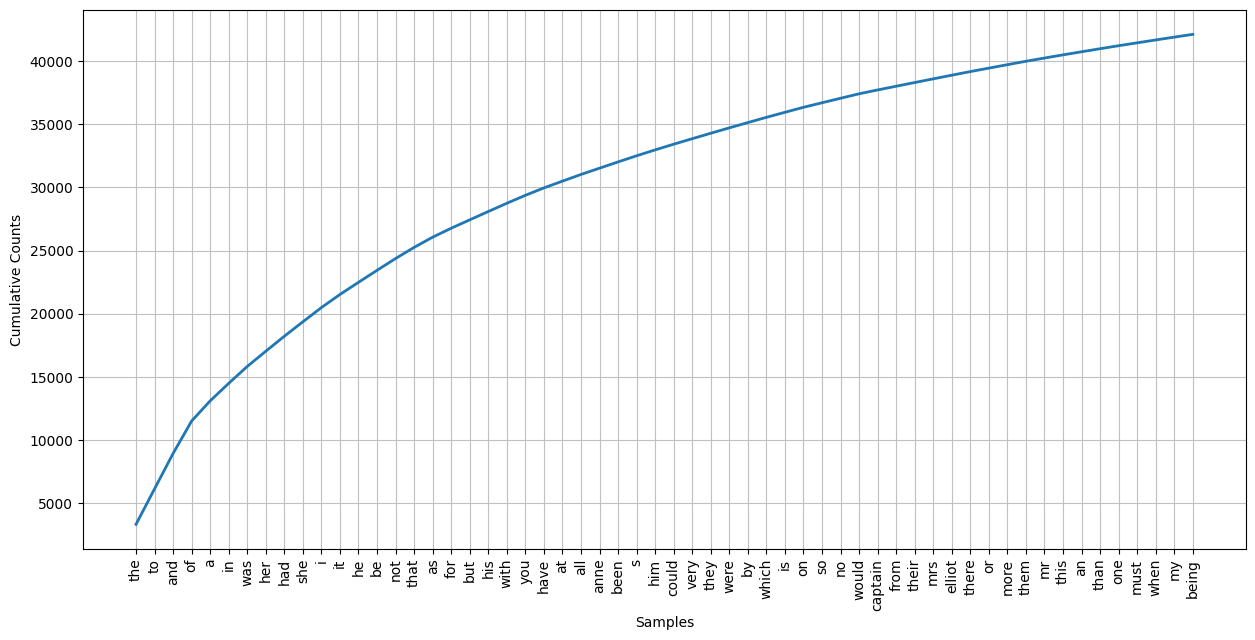

In [19]:
plt.figure(figsize=(15,7))
fdist.plot(58, cumulative = True)

**4. 200 most frequent words.**

Identify the 200 highest frequency words in this corpus.

In [20]:
wlist = []
for i in range(0, 200, 25):
    df = pd.DataFrame(fdist.most_common()[i:(i+25)])
    df.columns=['word', 'count']
    wlist.append(df)

pd.concat(wlist, axis=1)

,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count
0,the,3329,anne,497,this,250,might,166,how,125,out,95,family,80,back,69
1,to,2808,been,496,an,245,own,163,miss,125,house,94,felt,80,off,69
2,and,2801,s,485,than,243,well,163,your,124,say,93,give,79,admiral,69
3,of,2570,him,467,one,238,did,162,most,123,seemed,93,away,78,came,68
4,a,1595,could,451,must,228,herself,159,see,123,having,92,way,78,smith,68
5,in,1389,very,434,when,228,now,158,soon,122,up,91,ever,78,woman,67
6,was,1337,they,433,my,223,never,155,though,117,thought,90,uppercross,77,lyme,67
7,her,1204,were,426,being,220,we,155,father,117,elizabeth,89,day,77,just,66
8,had,1186,by,418,only,219,time,152,before,116,however,89,come,75,another,66
9,she,1146,which,416,wentworth,218,sir,149,two,114,last,88,feelings,75,clay,66


**Relative Frequency of These 200 Words**  
To illustrate the relative frequency of these 200 words, I need to create a graph that accurately represents this metric. Unfortunately, the default NLTK plot for frequency distributions only plots the absolute frequency of words, not the relative frequency. To address this, I can calculate the relative frequency by dividing the count of each word by the total word count in the corpus. Using these values, I can generate a custom graph to visually represent the relative frequency of the words.


<Axes: xlabel='Samples', ylabel='Counts'>

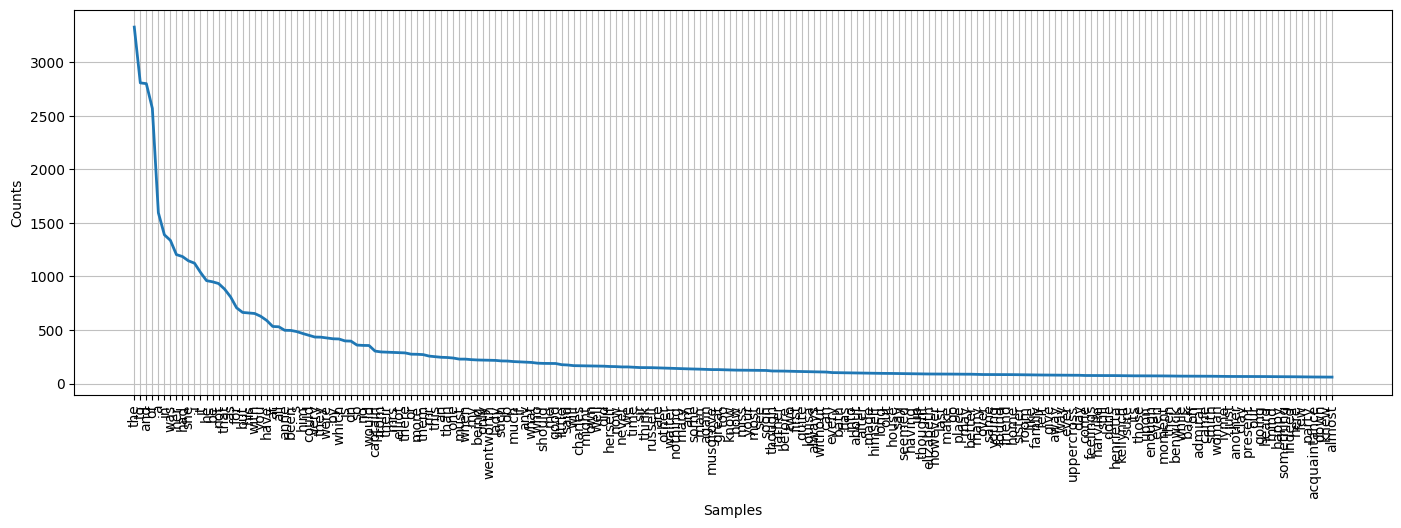

In [21]:
plt.figure(figsize=(17,5))
fdist.plot(200, )

In [22]:
my_dict = {}
wcount=0
for word, count in fdist.most_common():
    wcount=wcount+1
    my_dict[word]=count/tw
    if wcount>199:
        break

<BarContainer object of 200 artists>

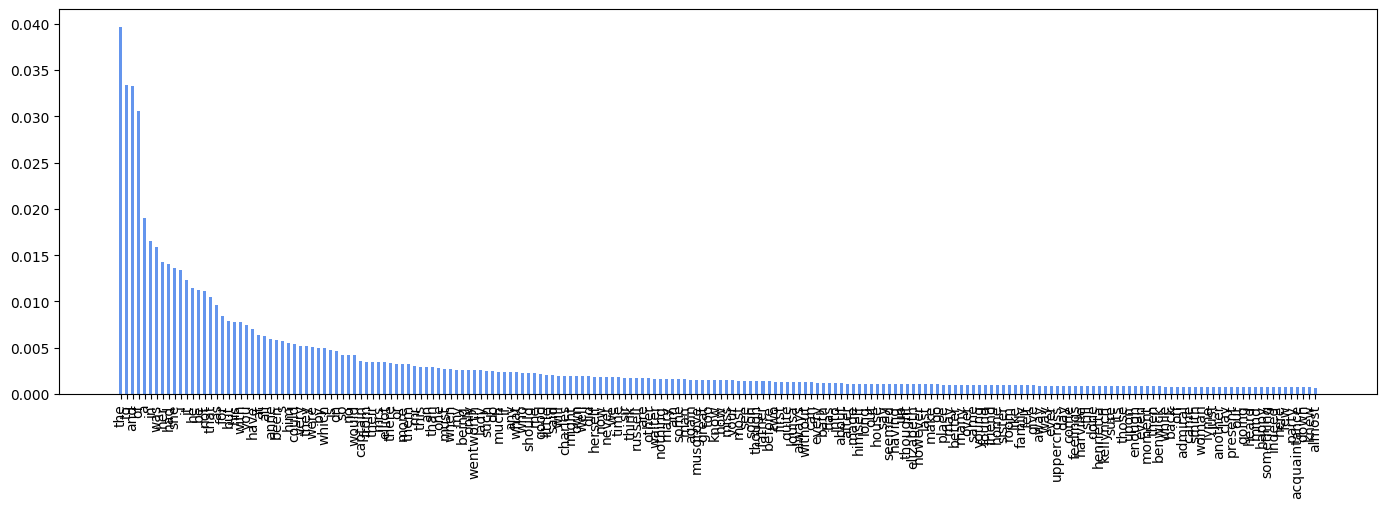

In [23]:
plt.figure(figsize=(17,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=4)
plt.bar(my_dict.keys(), my_dict.values(), width=.5, color='cornflowerblue')

**Zipf's Law**  
Does the observed relative frequency of these words align with Zipf’s Law?

According to Wikipedia, Zipf's Law is rooted in quantitative linguistics and describes a relationship in which the frequency of a word is inversely proportional to its rank in a frequency table. This means the most frequent word appears approximately twice as often as the second most frequent word, three times as often as the third, and so on, creating an inverse rank-frequency distribution. For example, in the Brown Corpus of American English, the word *the* is the most common word, accounting for nearly 7% of all word occurrences (69,971 out of just over 1 million). True to Zipf’s Law, the second most common word, *of*, accounts for slightly more than 3.5% (36,411 occurrences), followed by *and* (28,852 occurrences). Remarkably, only 135 vocabulary items are required to make up half of the Brown Corpus.

To test whether the observed relative frequency of words in this corpus follows Zipf’s Law, I will first write a function to calculate the expected counts of each word based on this relationship. Then, I’ll concatenate these results into a dataframe containing the actual counts, the difference between observed and expected values, and the percent difference for each word. This will allow us to effectively analyze and compare the data.



In [24]:
mostf = fdist.most_common()[0][1]
expected_counts = []
rank = 0
for i in range(len(fdist)):
    rank += 1
    expected_counts.append(round(mostf * (1/rank)))

expected_counts

zipfs_df = pd.DataFrame(fdist.most_common())
zipfs_df.columns=['Word', 'Actual count']
#pd.concat(zipfs_df, axis=1)
zipfs_df["Zipf's Expected Count"] = expected_counts
zipfs_df['Difference'] = zipfs_df['Actual count'] - zipfs_df["Zipf's Expected Count"]
zipfs_df['Percent Difference'] = round(((zipfs_df['Actual count'] / zipfs_df["Zipf's Expected Count"])
                                        - 1) *100).astype(int)
zipfs_df.head(30)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
0,the,3329,3329,0,0
1,to,2808,1664,1144,69
2,and,2801,1110,1691,152
3,of,2570,832,1738,209
4,a,1595,666,929,139
5,in,1389,555,834,150
6,was,1337,476,861,181
7,her,1204,416,788,189
8,had,1186,370,816,221
9,she,1146,333,813,244


In [25]:
zipfs_df[505:515]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
505,air,20,7,13,186
506,call,20,7,13,186
507,pleased,20,7,13,186
508,why,20,7,13,186
509,appeared,20,7,13,186
510,concert,20,7,13,186
511,took,19,7,12,171
512,handsome,19,6,13,217
513,delighted,19,6,13,217
514,conduct,19,6,13,217


In [26]:
zipfs_df[2500:2505]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
2500,sensibly,2,1,1,100
2501,discredit,2,1,1,100
2502,lesser,2,1,1,100
2503,occasions,2,1,1,100
2504,unequal,2,1,1,100


Not until the tail of the distribution do the actual and expected counts match.

In [27]:
zipfs_df.tail(5)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
5734,defiance,1,1,0,0
5735,accessions,1,1,0,0
5736,sunshine,1,1,0,0
5737,national,1,1,0,0
5738,finis,1,1,0,0


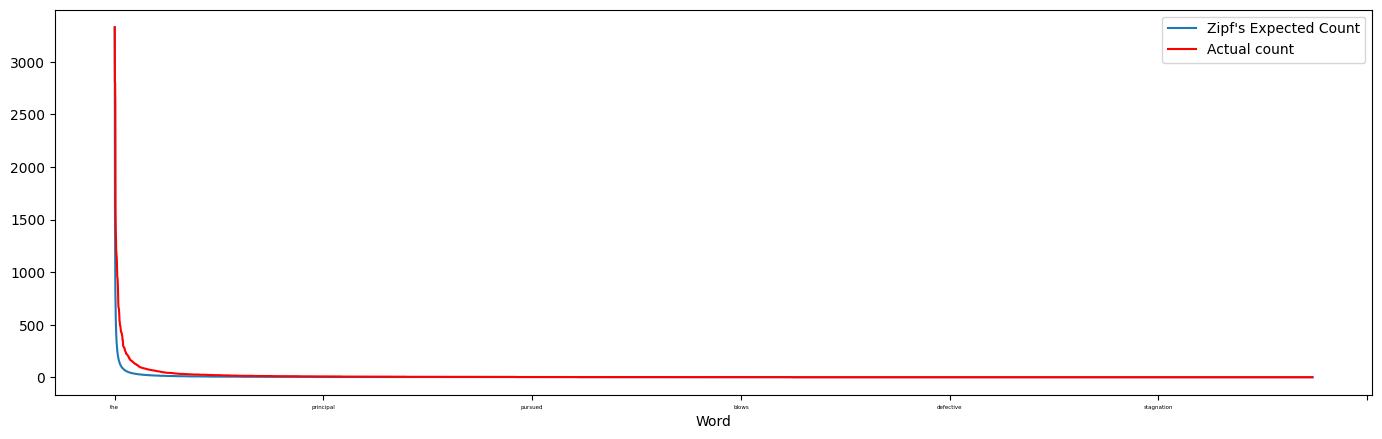

In [28]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df.plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df.plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

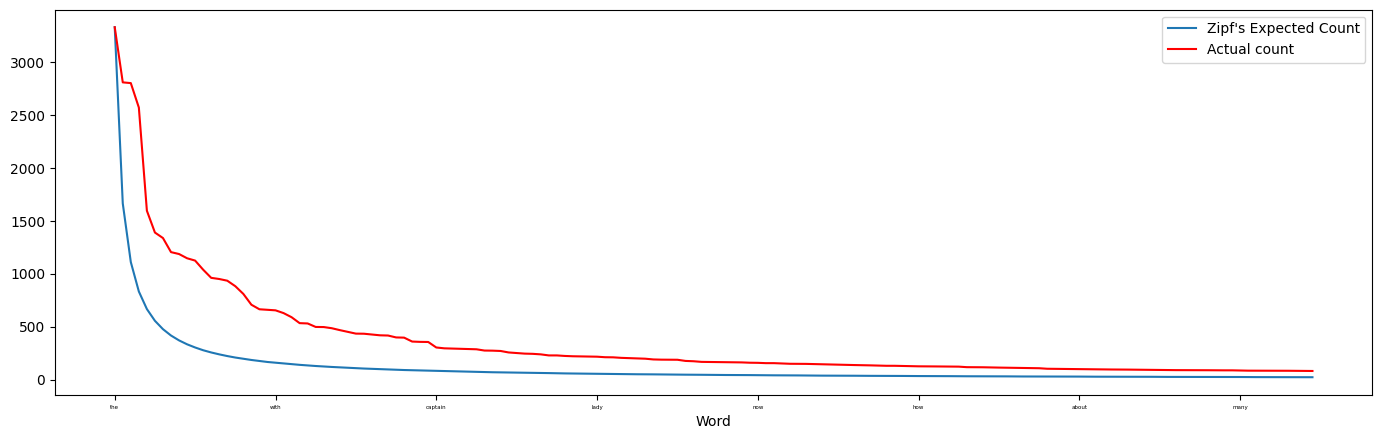

In [29]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df[:150].plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df[:150].plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

**Compare with 'All Words in All Corpora'**  

How does the frequency of words in this corpus differ from “all words in all corpora”? To explore this, I will use Wikipedia's list of the most common words in the English language as a benchmark for "all words in all corpora." Specifically, I will import the list of the top 100 most frequently used English words from Wikipedia to serve as a reference point for comparison.



In [30]:
mc_english_words = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English#100_most_common_words',
                 header=0, index_col=None)
mc_english_words = mc_english_words[0]
mc_english_words['Word'] = mc_english_words['Word'].str.lower()
mc_english_words

,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,the,Article,1,1,Pre-primer,12
1,be,Verb,2,2,Primer,21
2,to,Preposition,3,"7, 9",Pre-primer,17
3,of,Preposition,4,4,Grade 1,12
4,and,Coordinator,5,3,Pre-primer,16
...,...,...,...,...,...,...
95,these,Pronoun,96,82,Grade 2,2
96,give,Verb,97,98,Grade 1,19
97,day,Noun,98,90,Dolch list of 95 nouns,9
98,most,Adverb,99,"144, 187",NaN,12


In [31]:
austen_100 = pd.DataFrame(fdist.most_common()[:100], columns=['Austen_Word', 'Austen_Frequency'])
austen_100['Austen_Rank'] = austen_100.index +1
austen_100

,Austen_Word,Austen_Frequency,Austen_Rank
0,the,3329,1
1,to,2808,2
2,and,2801,3
3,of,2570,4
4,a,1595,5
...,...,...,...
95,again,132,96
96,musgrove,130,97
97,great,130,98
98,too,128,99


In [32]:
pd.set_option('display.max_rows', 500)
words_merged = pd.merge(austen_100,mc_english_words,left_on='Austen_Word',right_on='Word',how='outer')
top_100 = words_merged.fillna('')
top_100

,Austen_Word,Austen_Frequency,Austen_Rank,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,a,1595.0,5.0,a,Article,6,5,Pre-primer,20.0
1,,,,about,"Preposition, adverb, et al.",45,"46, 179",Grade 3,18.0
2,,,,after,Preposition,82,"120, 260",Grade 1,14.0
3,again,132.0,96.0,,,,,,
4,all,530.0,25.0,all,Adjective,36,"43, 222",Primer,15.0
5,,,,also,Adverb,80,87,,2.0
6,am,137.0,93.0,,,,,,
7,an,245.0,52.0,an,Article,32,(a),Grade 1,6.0
8,and,2801.0,3.0,and,Coordinator,5,3,Pre-primer,16.0
9,anne,497.0,26.0,,,,,,


From the list above, it is evident that many words frequently used in Austen's text, but absent from the Wikipedia list, are likely specific to the context of the story. These include titles and proper names, such as *Anne*, *Captain*, *Charles*, *Wentworth*, and *Russell*. Additionally, terms like *lady*, *sir*, and *Musgrove* appear frequently in Austen's writing but are not as commonly used in broader contexts. This discrepancy reflects the unique linguistic patterns and themes within the story being analyzed.

